# 🐍 Diferenciación $d=1$ y Análisis de Autocorrelación

hgfhghghghghfdfd

In [2]:
# Importar el dataset, aplicar la transformación d=1 de diferenciación a ambas series de temperatura,
# y analizar la autocorrelación (ACF/PACF) de las series diferenciadas.

# --- 1. Configuración e Importación ---
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np # Importar numpy para la diferenciación, aunque pandas.diff() es suficiente

# Configuración de matplotlib para gráficos más limpios
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('seaborn-v0_8-whitegrid')

# Cargar el dataset limpio
df = pd.read_csv('dataset/pinar_del_rio_temperaturas_LIMPIO_FINAL.csv', index_col='Fecha', parse_dates=True)

# Separar las series de tiempo
ts_maxima = df['Temp_Maxima_C']
ts_minima = df['Temp_Minima_C']

In [3]:
# --- 2. Aplicar Diferenciación d=1 (Regular) a Ambas Series ---

# Aplicar la diferenciación de orden 1 (d=1) a la Temp Máxima
ts_maxima_diff = ts_maxima.diff().dropna()
print("\n--- Temp Máxima Diferenciada (d=1) ---")
print(f"Longitud: {len(ts_maxima_diff)}")

# Aplicar la diferenciación de orden 1 (d=1) a la Temp Mínima
ts_minima_diff = ts_minima.diff().dropna()
print("--- Temp Mínima Diferenciada (d=1) ---")
print(f"Longitud: {len(ts_minima_diff)}")


--- Temp Máxima Diferenciada (d=1) ---
Longitud: 670
--- Temp Mínima Diferenciada (d=1) ---
Longitud: 670



--- 📉 Análisis de Autocorrelación de Series Diferenciadas (d=1) hasta Lag 334 ---


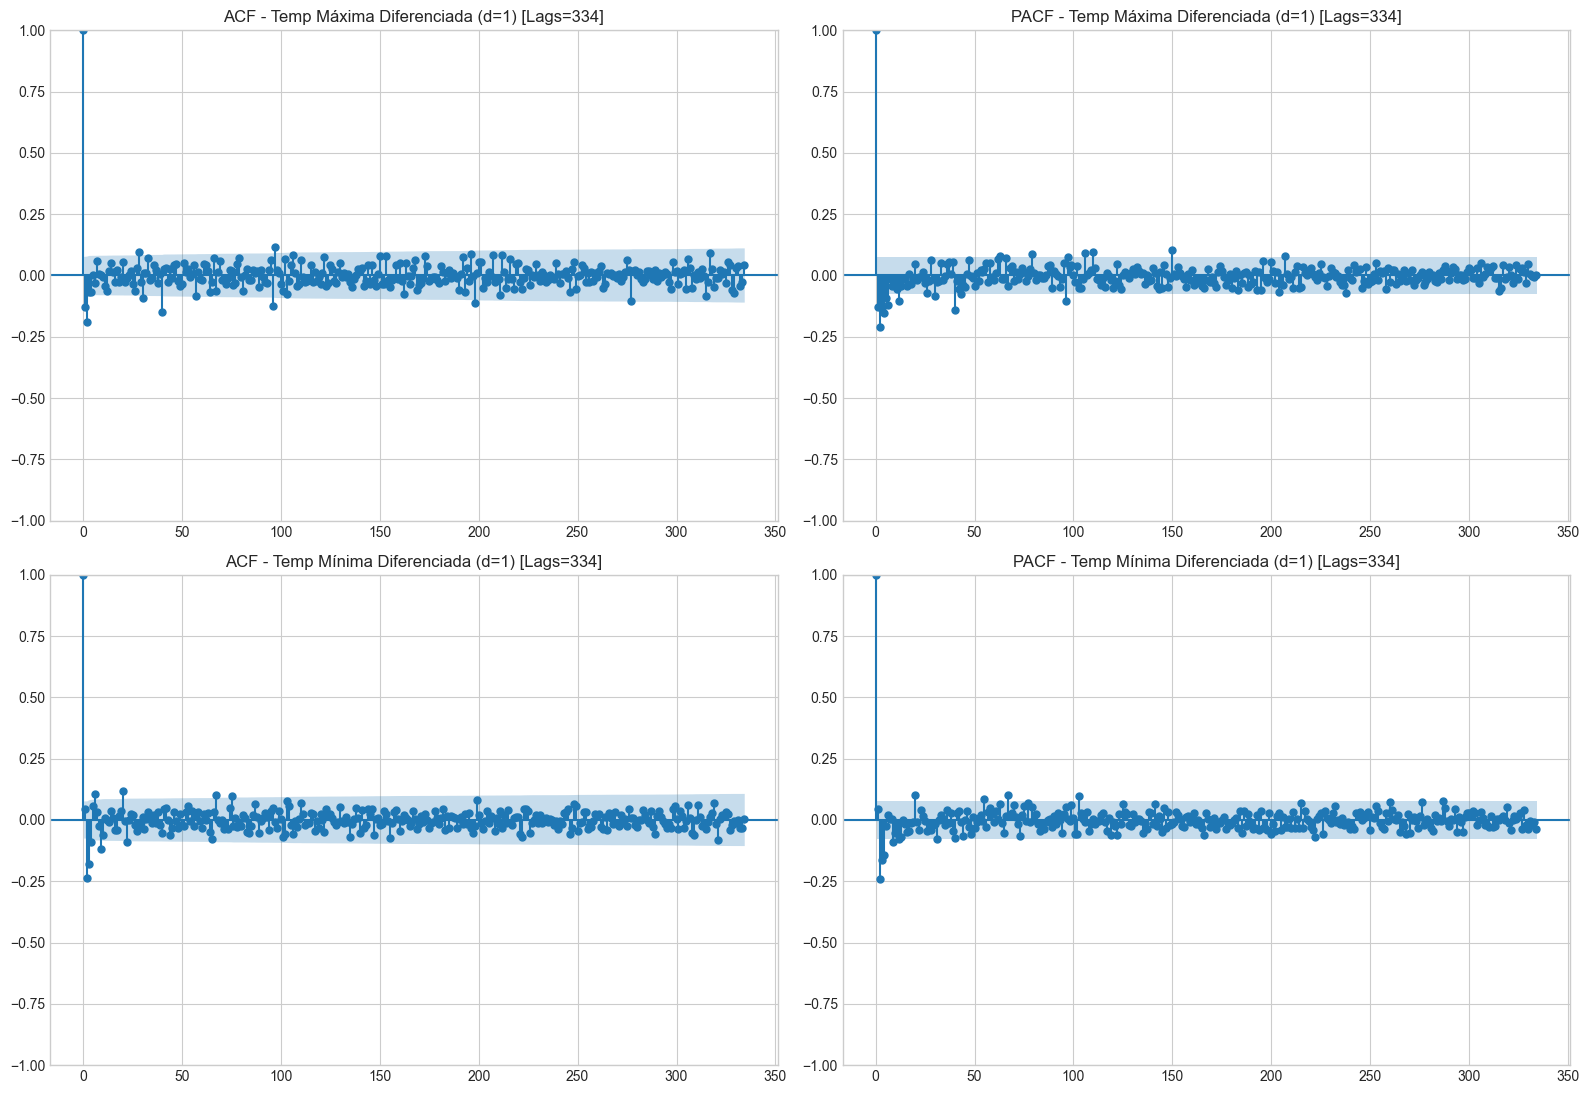

In [7]:
# --- 3. Análisis Gráfico (ACF y PACF) ---

# Ajustamos MAX_LAGS a 334 (el límite de seguridad de 50% de N=670 para la función PACF)
MAX_LAGS = 334 
print(f"\n--- 📉 Análisis de Autocorrelación de Series Diferenciadas (d=1) hasta Lag {MAX_LAGS} ---")

plt.figure(figsize=(16, 12))

## A. Temp Máxima Diferenciada (d=1)
ax1 = plt.subplot(221)
plot_acf(ts_maxima_diff, lags=MAX_LAGS, ax=ax1, title=f'ACF - Temp Máxima Diferenciada (d=1) [Lags={MAX_LAGS}]')
ax2 = plt.subplot(222)
plot_pacf(ts_maxima_diff, lags=MAX_LAGS, ax=ax2, title=f'PACF - Temp Máxima Diferenciada (d=1) [Lags={MAX_LAGS}]')

## B. Temp Mínima Diferenciada (d=1)
ax3 = plt.subplot(223)
plot_acf(ts_minima_diff, lags=MAX_LAGS, ax=ax3, title=f'ACF - Temp Mínima Diferenciada (d=1) [Lags={MAX_LAGS}]')
ax4 = plt.subplot(224)
plot_pacf(ts_minima_diff, lags=MAX_LAGS, ax=ax4, title=f'PACF - Temp Mínima Diferenciada (d=1) [Lags={MAX_LAGS}]')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()